In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.datasets import co2
from sklearn.model_selection import train_test_split

### **Read and Process the Data**

In [ ]:
data = pd.read_csv("/content/city_temperature.csv")
data.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Middle East,Turkey,Ankara,12,22,2005,21.0
1,North America,US,Portland,5,4,2020,52.6
2,Asia,Nepal,Katmandu,4,25,2000,66.5
3,North America,US,Tulsa,7,17,2007,83.5
4,Asia,Laos,Vientiane,7,17,2014,82.8


**Find the Countries registered in the dataset**

In [ ]:
data['Country'].unique()

array(['Turkey', 'US', 'Nepal', 'Laos', 'Mongolia', 'Burundi', 'Mexico',
       'Kuwait', 'Belgium', 'Bangladesh', 'Ireland', 'Switzerland',
       'Ukraine', 'China', 'Taiwan', 'Qatar', 'Togo', 'Ivory Coast',
       'Namibia', 'Ethiopia', 'Canada', 'Barbados', 'Norway', 'Egypt',
       'Brazil', 'Benin', 'North Korea', 'Kyrgyzstan', 'Spain',
       'Colombia', 'Latvia', 'Australia', 'Germany', 'Haiti', 'Equador',
       'Croatia', 'Tunisia', 'New Zealand', 'Japan', 'United Kingdom',
       'Panama', 'Singapore', 'South Africa', 'Albania', 'Zambia', 'Peru',
       'The Netherlands', 'Israel', 'India', 'Morocco', 'Vietnam',
       'Nigeria', 'Slovakia', 'Cuba', 'Syria', 'Kenya', 'France',
       'Bahrain', 'Mauritania', 'Malaysia', 'Poland', 'Bahamas',
       'United Arab Emirates', 'Finland', 'Indonesia', 'Hong Kong',
       'Malawi', 'Honduras', 'Uruguay', 'Macedonia', 'Hungary',
       'Dominican Republic', 'Venezuela', 'Denmark', 'Philippines',
       'Uzbekistan', 'Iceland', 'Russi

**Show the average of temperature in fahrenheit for every region**

Region
Africa                               55.032426
Asia                                 64.213204
Australia/South Pacific              61.633333
Europe                               45.123113
Middle East                          68.558937
North America                        55.698891
South/Central America & Carribean    57.353960
Name: AvgTemperature, dtype: float64


Text(0.5, 1.0, 'Mean Average Temperatures by Region')

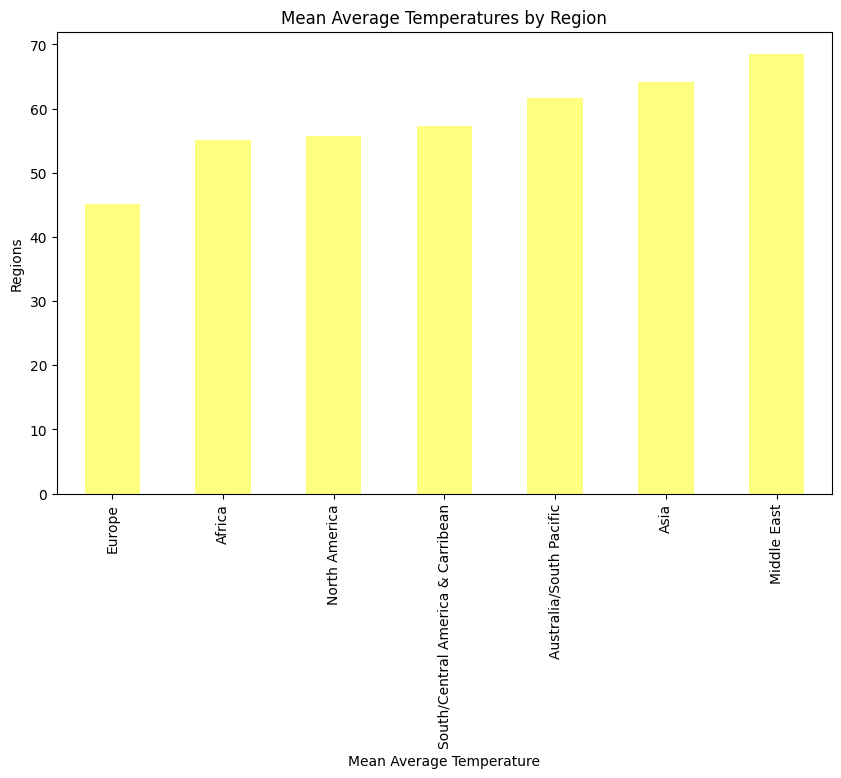

In [ ]:
print(data.groupby(['Region'])['AvgTemperature'].mean())
avg_temp_world = pd.Series(round(data.groupby('Region')['AvgTemperature'].mean().sort_values(),2))
avg_temp_world.plot(kind='bar', figsize = (10,6), color='yellow', alpha=0.5)
plt.xlabel('Mean Average Temperature')
plt.ylabel('Regions')
plt.title('Mean Average Temperatures by Region')

### **You need to forecasting the average temperature of Jordan in Celcius**

> Hint: from Fahrenheit  to Celcius you can use

(temp - 32) * 5) / 9)

In [ ]:
df = data[(data['Country']=='Jordan')]

**Convert the Date feature to datetime**

> Hint: use pd.to_datetime((df.Year*10000 + df.Month*100 + df.Day).apply(str),format='%Y%m%d')

In [ ]:
df["Date"] = pd.to_datetime((df.Year*10000 + df.Month*100 + df.Day).apply(str),format='%Y%m%d')
df.head()

<ipython-input-11-5817568d4b69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime((df.Year*10000 + df.Month*100 + df.Day).apply(str),format='%Y%m%d')


,Region,Country,City,Month,Day,Year,AvgTemperature,Date
623,Middle East,Jordan,Amman,4,19,2007,54.9,2007-04-19
674,Middle East,Jordan,Amman,1,31,1996,55.7,1996-01-31
886,Middle East,Jordan,Amman,8,25,1999,74.4,1999-08-25
1342,Middle East,Jordan,Amman,2,17,2007,50.5,2007-02-17
1774,Middle East,Jordan,Amman,6,21,2015,69.6,2015-06-21


<ipython-input-20-1214f6a5f7fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AvgTempCelcius'] = round((((df.loc[:,'AvgTemperature'] - 32) * 5) / 9),2)
<ipython-input-20-1214f6a5f7fc>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x = 'Year', y = 'AvgTempCelcius', data = df , palette='Set2')


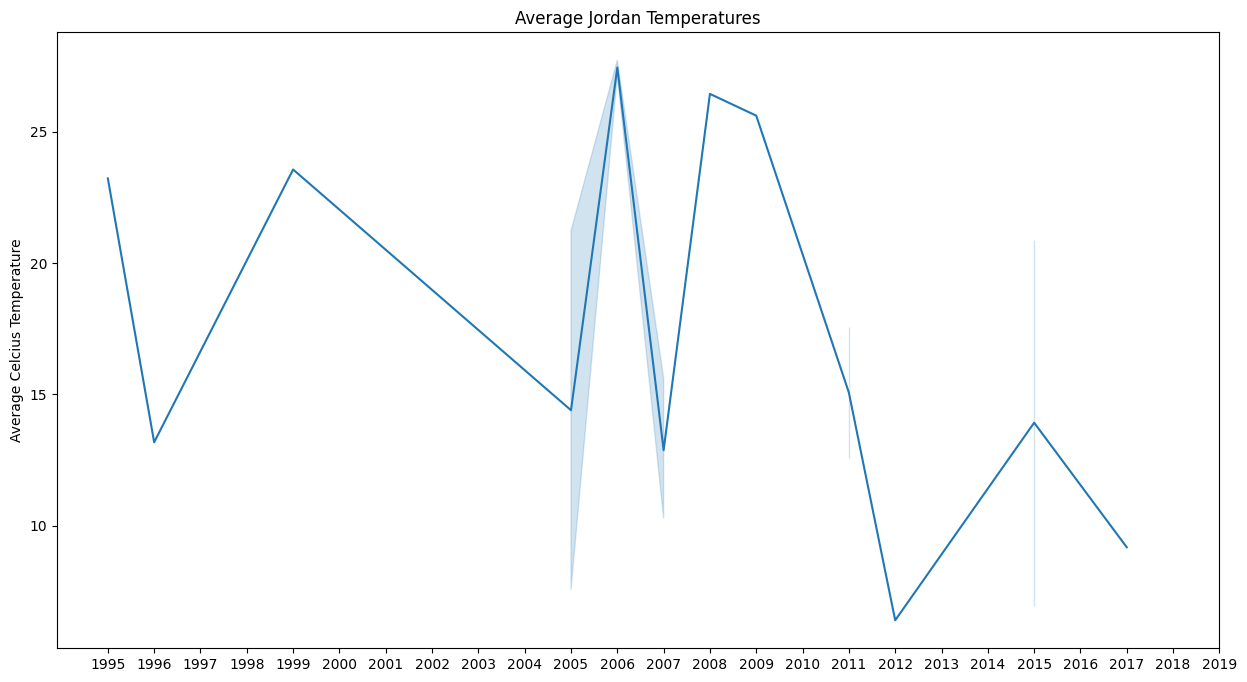

In [ ]:
import seaborn as sns
df['AvgTempCelcius'] = round((((df.loc[:,'AvgTemperature'] - 32) * 5) / 9),2)
plt.figure(figsize=(15,8))
sns.lineplot(x = 'Year', y = 'AvgTempCelcius', data = df , palette='Set2')
plt.title('Average Jordan Temperatures')
plt.ylabel('Average Celcius Temperature')
plt.xlabel('')
plt.xticks(range(1995,2020))
plt.show();

**Convert dates to numerical representation (number of days since a reference date)**

>Hint: using the minimum date as the reference date

> (Date - the minimum date).dt.days.astype(np.float32) to convert it to numerical

In [ ]:
ref_date = df['Date'].min()
df['NumericDate'] = (df['Date'] - ref_date).dt.days.astype(np.float32)
df.index = df['Date']
df.drop(['Date'], axis=1, inplace=True)
df

<ipython-input-17-46b8866a293a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumericDate'] = (df['Date'] - ref_date).dt.days.astype(np.float32)
<ipython-input-17-46b8866a293a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Date'], axis=1, inplace=True)


,Region,Country,City,Month,Day,Year,AvgTemperature,NumericDate
Date,,,,,,,,
2007-04-19,Middle East,Jordan,Amman,4,19,2007,54.9,4341.0
1996-01-31,Middle East,Jordan,Amman,1,31,1996,55.7,245.0
1999-08-25,Middle East,Jordan,Amman,8,25,1999,74.4,1547.0
2007-02-17,Middle East,Jordan,Amman,2,17,2007,50.5,4280.0
2015-06-21,Middle East,Jordan,Amman,6,21,2015,69.6,7326.0
2009-07-31,Middle East,Jordan,Amman,7,31,2009,78.1,5175.0
2017-03-16,Middle East,Jordan,Amman,3,16,2017,48.5,7960.0
2006-08-26,Middle East,Jordan,Amman,8,26,2006,81.9,4105.0
1995-05-31,Middle East,Jordan,Amman,5,31,1995,73.8,0.0


**Sort the DataFrame by the Date**

In [ ]:
df.sort_index(inplace=True)
df

<ipython-input-18-b0a93681753a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


,Region,Country,City,Month,Day,Year,AvgTemperature,NumericDate
Date,,,,,,,,
1995-05-31,Middle East,Jordan,Amman,5,31,1995,73.8,0.0
1996-01-31,Middle East,Jordan,Amman,1,31,1996,55.7,245.0
1999-08-25,Middle East,Jordan,Amman,8,25,1999,74.4,1547.0
2005-09-25,Middle East,Jordan,Amman,9,25,2005,70.2,3770.0
2005-12-28,Middle East,Jordan,Amman,12,28,2005,45.6,3864.0
2006-08-12,Middle East,Jordan,Amman,8,12,2006,80.9,4091.0
2006-08-26,Middle East,Jordan,Amman,8,26,2006,81.9,4105.0
2007-02-17,Middle East,Jordan,Amman,2,17,2007,50.5,4280.0
2007-04-19,Middle East,Jordan,Amman,4,19,2007,54.9,4341.0


**Assign the dependent and independent features**

> Dependent: Average of Temperature  in Celcius

> Independent: Date

In [ ]:
X = df['NumericDate']
Y = df['AvgTempCelcius']

**Reshaping X to match Model input shape (samples, time steps, features)**

> Hint use the shape (-1, 1, 1)

In [ ]:
X = np.array(X).reshape(-1, 1, 1)

**Normalizing the dependent feature**


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
Y = scaler.fit_transform(np.array(Y).reshape(-1, 1))

**Splitting data into training and testing sets**

In [ ]:
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(Y)]

#### **Building the RNN model**

>Hint: use Sequential() model and add two layers of SimpleRNN()

>The first one has 50 units, retur_sequences=True, and the input_shape is (X_train.shape[1], 1).

>The second RNN layer has 50 units which followed by a Desnce layer that have 1 units.

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(SimpleRNN(units=50))
model.add(Dense(units=1))

**Compiling the model**

>set the oprimizer to adam, and the loss metric to mean_squared_error

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Training the model using fit() method**

>set epochs to 10, and the batch size to 32

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 1.2854
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.8029
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 0.4557
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2423
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.1518
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1590
Epoch 7/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2235
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2983
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3483
Epoch 10/10
1/1 [==============================] - 0s 10ms/step - loss: 0.3598


**Evaluating the model using evaluate() method**

>show the MSE and RMSE for the test score got from the evaluate() method on the testing dataset

In [ ]:
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

Test Score: 0.69 MSE (0.83 RMSE)


#### **Building the LSTM model**

>Hint: use Sequential() model and add two layers of LSTM()

>The first one has 50 units, retur_sequences=True, and the input_shape is (X_train.shape[1], 1).

>The second LSTM layer has 50 units which followed by a Desnce layer that have 1 units.

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

**Compiling the model**

>set the oprimizer to adam, and the loss metric to mean_squared_error

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

**Training the model using fit() method**

>set epochs to 10, and the batch size to 32

In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 0.3839
Epoch 2/10
1/1 [==============================] - 0s 12ms/step - loss: 0.3513
Epoch 3/10
1/1 [==============================] - 0s 11ms/step - loss: 0.3235
Epoch 4/10
1/1 [==============================] - 0s 14ms/step - loss: 0.2977
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2739
Epoch 6/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2520
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2322
Epoch 8/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2144
Epoch 9/10
1/1 [==============================] - 0s 12ms/step - loss: 0.1988
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1853


**Evaluating the model using evaluate() method**

>show the MSE and RMSE for the test score got from the evaluate() method on the testing dataset

In [ ]:
test_score = model.evaluate(X_test, Y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (test_score, np.sqrt(test_score)))

Test Score: 0.09 MSE (0.30 RMSE)
